In [37]:
# BEFORE PERTURBATIONS

import os
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, CatBoostRegressor

import sys, os
sys.path.append(os.path.abspath('../'))
from src.data.cic_preprocess import *

# Directory paths
models_dir = "../models"
data_dir = "../data/processed"

# Loading models
models = {file.split('_model.cbm')[0]: CatBoostRegressor().load_model(os.path.join(models_dir, file))
          for file in os.listdir(models_dir) if file.endswith('.cbm')}

# Testing models
accuracies = []
for model_name, model in models.items():
    if "donbot" in model_name and "regressor" in model_name:
        # File name of the test data corresponds to the model name
        test_file_name = f"botnet-capture-20110816-donbot_perturbed_flows.csv"
        test_file_path = os.path.join(data_dir, test_file_name)
        
        # Loading test data
        X_test = preprocess_traffic(test_file_path)
        y_test = np.ones(X_test.shape[0])  # Assuming all samples are malicious, so y_test should be all ones
        
        # Model prediction
        predictions = model.predict(X_test)
        
        # Calculating accuracy
        #accuracy = np.mean(predictions == y_test)
        accuracies.append(predictions)
        
        # Detailed logging
        print(f"Testing {model_name}:")
        print(f"Accuracy: {accuracy:.5%}")
        print(f"Predicted distribution: {np.unique(predictions, return_counts=True)}")
        print(f"Number of samples: {len(predictions)}")
        print(f"Number of malicious (1) predictions: {np.sum(predictions == 1)}")
        print(f"Number of benign (0) predictions: {np.sum(predictions == 0)}\n")

# Average accuracy
mean_accuracy = np.mean(accuracies)
print(f"\nAverage accuracy across all test cases: {mean_accuracy:.5%}")


Testing botnet-capture-20110816-donbot_regressor:
Accuracy: 0.00000%
Predicted distribution: (array([0.62534503, 0.64898237, 0.74787345, 0.7497905 , 0.75335802,
       0.8009568 , 0.80717895, 0.8076858 , 0.81447338, 0.81872199,
       0.81945121, 0.82230388, 0.83007492, 0.83105906, 0.8321185 ,
       0.84490616, 0.85101247, 0.85233568, 0.85270038, 0.85290934,
       0.85426624, 0.8549552 , 0.85777045, 0.85858293, 0.85971616,
       0.86533856, 0.8677204 , 0.86785157, 0.86803647, 0.86830192,
       0.87017037, 0.87052927, 0.87312926, 0.87735637, 0.87946308,
       0.88116474, 0.89197446, 0.89234846, 0.89518199, 0.89717326,
       0.89779966, 0.89861614, 0.89969457, 0.9004802 , 0.90517348,
       0.90878247, 0.91130112, 0.92248117, 0.92459482, 0.92461185,
       0.92866419, 0.93037054, 0.93085627, 0.93119664, 0.93198253,
       0.93264221, 0.93306752, 0.93514631, 0.93802552, 0.93814978,
       0.94000824, 0.9406864 , 0.94068664, 0.94084642, 0.9414932 ,
       0.94637859, 0.94674345, 0.94

In [34]:
# for control

df_norm = pd.read_csv("../data/processed/CTU13_Normal_Traffic_20.csv")

X_test = df_norm
y_test = np.zeros(X_test.shape[0])

# Model prediction
predictions = model.predict(X_test)
    
    # Calculating accuracy
accuracy = np.mean(predictions == y_test)
accuracies.append(accuracy)
    
    # Detailed logging

print(f"Accuracy: {accuracy:.5%}")
print(f"Predicted distribution: {np.unique(predictions, return_counts=True)}")
print(f"Number of samples: {len(predictions)}")
print(f"Number of malicious (1) predictions: {np.sum(predictions == 1)}")
print(f"Number of benign (0) predictions: {np.sum(predictions == 0)}\n")


Accuracy: 0.00000%
Predicted distribution: (array([-0.04024131, -0.03755777, -0.03082265, ...,  0.28074588,
        0.31721558,  0.87318647]), array([1, 1, 1, ..., 1, 1, 1]))
Number of samples: 10663
Number of malicious (1) predictions: 0
Number of benign (0) predictions: 0



In [33]:

import os
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, CatBoostRegressor

import sys, os
sys.path.append(os.path.abspath('../'))
from src.data.cic_preprocess import *

# Directory paths
models_dir = "../models"
data_dir = "../data/processed"

# Loading models
models = {file.split('_model.cbm')[0]: CatBoostRegressor().load_model(os.path.join(models_dir, file))
          for file in os.listdir(models_dir) if file.endswith('.cbm')}

# Testing models
accuracies = []
for model_name, model in models.items():
    if "donbot" in model_name and "regressor" in model_name:
        # File name of the test data corresponds to the model name
        test_file_name = f"botnet-capture-20110816-donbot_perturbed_cb_flows1.csv"
        test_file_path = os.path.join(data_dir, test_file_name)
        
        # Loading test data
        X_test = preprocess_traffic(test_file_path)
        y_test = np.ones(X_test.shape[0])  # Assuming all samples are malicious, so y_test should be all ones
        
        # Model prediction
        predictions = model.predict(X_test)
        
        # Calculating accuracy
        #accuracy = np.mean(predictions == y_test)
        accuracies.append(predictions)
        
        # Detailed logging
        print(f"Testing {model_name}:")
        print(f"Accuracy: {accuracy:.5%}")
        print(f"Predicted distribution: {np.unique(predictions, return_counts=True)}")
        print(f"Number of samples: {len(predictions)}")
        print(f"Number of malicious (1) predictions: {np.sum(predictions == 1)}")
        print(f"Number of benign (0) predictions: {np.sum(predictions == 0)}\n")

# Average accuracy
mean_accuracy = np.mean(accuracies)
print(f"\nAverage accuracy across all test cases: {mean_accuracy:.5%}")


Testing botnet-capture-20110816-donbot_regressor:
Accuracy: 0.00000%
Predicted distribution: (array([0.65132132, 0.67175716, 0.68729463, 0.70283388, 0.70860338,
       0.75560212, 0.75585497, 0.75911682, 0.76616889, 0.7865128 ,
       0.83264166, 0.84744551, 0.85652321, 0.8568437 , 0.86412624,
       0.86513412, 0.87004382, 0.87120722, 0.87311558, 0.87316687,
       0.87627905, 0.87802113, 0.88557546, 0.89081615, 0.89145383,
       0.89368119, 0.89439845, 0.89667129, 0.89721861, 0.90315403,
       0.90518324, 0.90750095, 0.9075402 , 0.90760268, 0.91161738,
       0.91538199, 0.92636557, 0.9278697 , 0.92789077, 0.93110868,
       0.93368883, 0.93768945, 0.93811556, 0.94071185, 0.941543  ,
       0.94281565, 0.94622826, 0.94783203, 0.95004295, 0.96213719,
       0.96213879, 0.96215177, 0.96215221, 0.96215228, 0.96218356,
       0.96255274, 0.96286829, 0.96456014, 0.96464669, 0.9650832 ,
       0.9651444 , 0.96526861, 0.96576392, 0.96873042, 0.96880073,
       0.96925837, 0.96933133, 0.97

In [23]:
# for control

df_norm = pd.read_csv("../data/processed/CTU13_Normal_Traffic_20.csv")

X_test = df_norm
y_test = np.zeros(X_test.shape[0])

# Model prediction
predictions = model.predict(X_test)
    
    # Calculating accuracy
#accuracy = np.mean(predictions == y_test)
accuracies.append(predictions)
    
    # Detailed logging

print(f"Accuracy: {accuracy:.5%}")
print(f"Predicted distribution: {np.unique(predictions, return_counts=True)}")
print(f"Number of samples: {len(predictions)}")
print(f"Number of malicious (1) predictions: {np.sum(predictions == 1)}")
print(f"Number of benign (0) predictions: {np.sum(predictions == 0)}\n")


Accuracy: 0.00000%
Predicted distribution: (array([-0.04024131, -0.03755777, -0.03082265, ...,  0.28074588,
        0.31721558,  0.87318647]), array([1, 1, 1, ..., 1, 1, 1]))
Number of samples: 10663
Number of malicious (1) predictions: 0
Number of benign (0) predictions: 0



In [22]:
predictions

array([ 5.12115985e-05,  2.22712308e-05, -3.27343073e-05, ...,
       -2.89068875e-05, -4.07647506e-06, -7.00226543e-06])

Testing botnet-capture-20110810-neris_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.918086
dtype: float64
Number of samples: 1828
Number of malicious (1) predictions: 0    467
dtype: int64
Number of benign (0) predictions: 0    9
dtype: int64


Average accuracy across all test cases: 92.20328%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


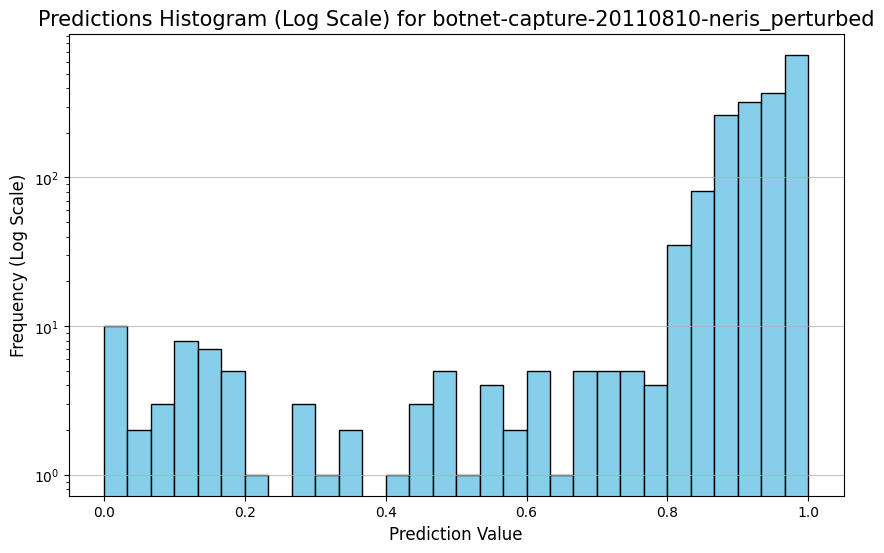

Testing botnet-capture-20110812-rbot_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.923483
dtype: float64
Number of samples: 126
Number of malicious (1) predictions: 0    9
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 92.42313%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


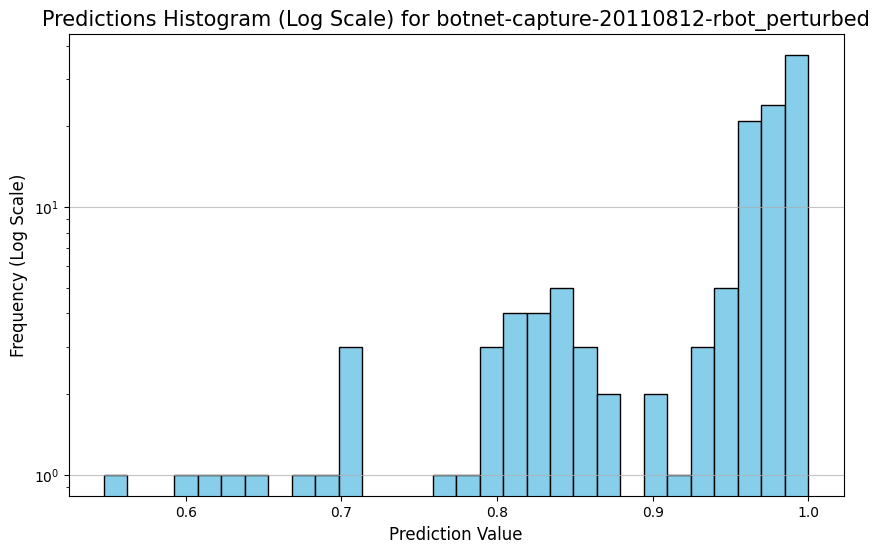

Testing botnet-capture-20110815-fast-flux-2_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.951358
dtype: float64
Number of samples: 157
Number of malicious (1) predictions: 0    83
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 95.38343%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


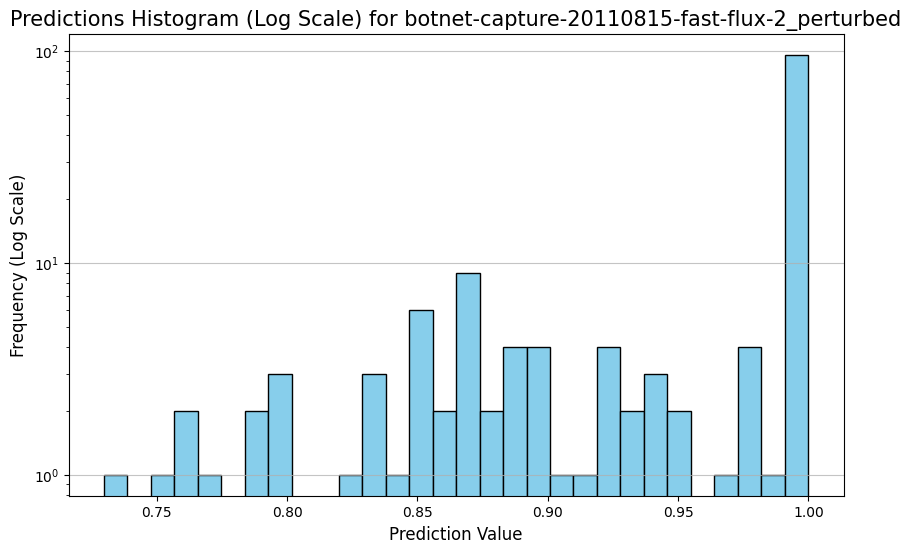

Testing botnet-capture-20110815-fast-flux-2_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.907438
dtype: float64
Number of samples: 74
Number of malicious (1) predictions: 0    10
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 90.98845%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


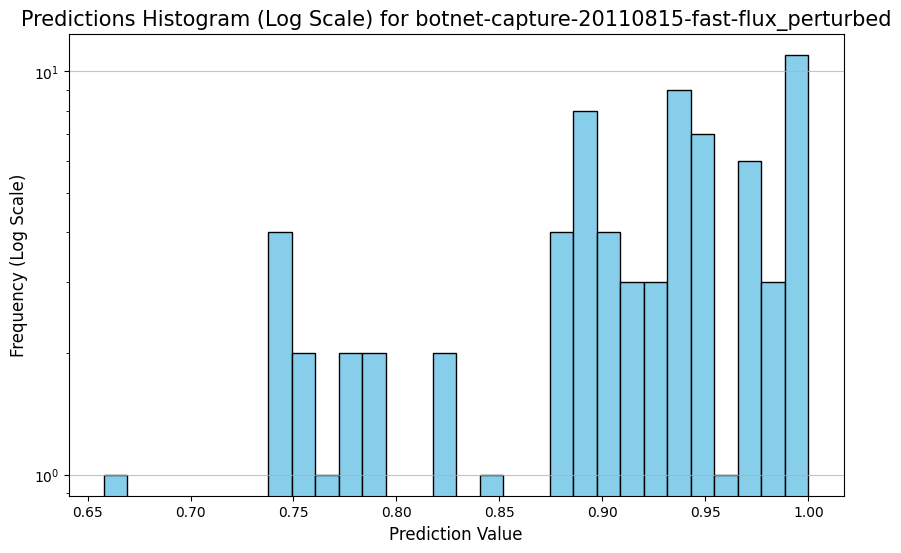

Testing botnet-capture-20110815-fast-flux_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.874408
dtype: float64
Number of samples: 74
Number of malicious (1) predictions: 0    4
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 89.26419%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


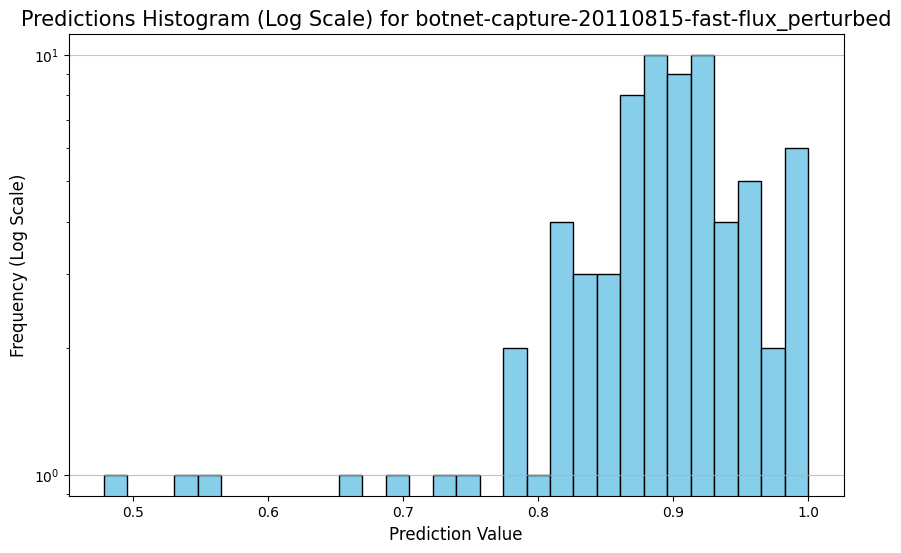

Testing botnet-capture-20110815-rbot-dos_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.951777
dtype: float64
Number of samples: 2
Number of malicious (1) predictions: 0    1
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 96.91832%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


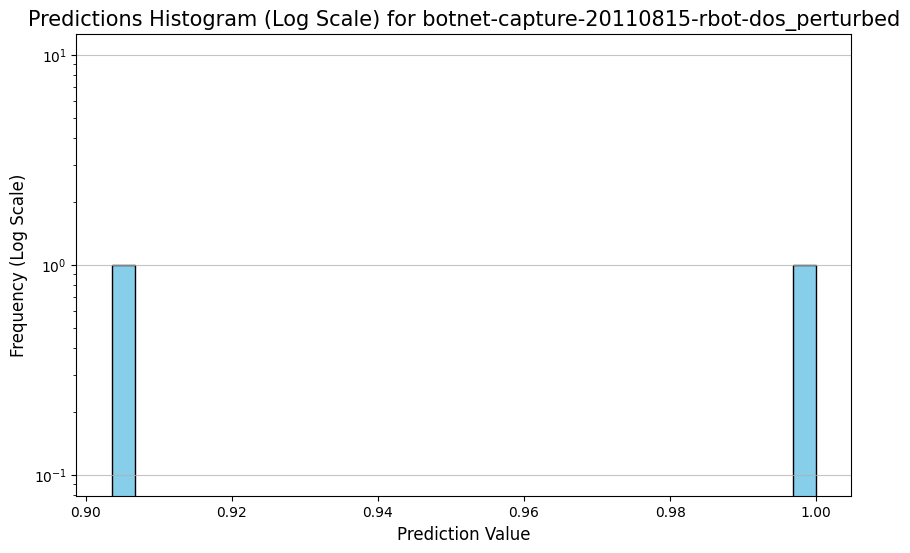

Testing botnet-capture-20110816-donbot_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.922008
dtype: float64
Number of samples: 90
Number of malicious (1) predictions: 0    7
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 92.30958%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


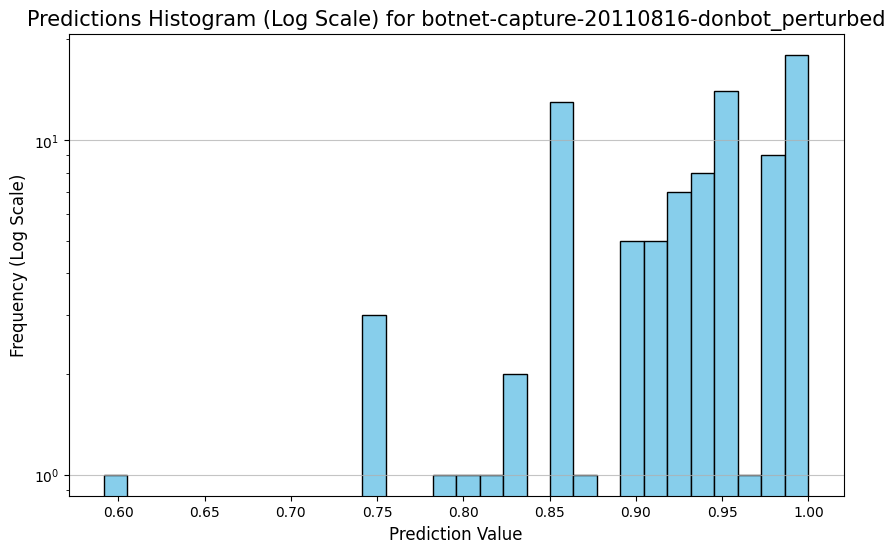

Testing botnet-capture-20110816-qvod_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.877723
dtype: float64
Number of samples: 126
Number of malicious (1) predictions: 0    15
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 87.91200%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


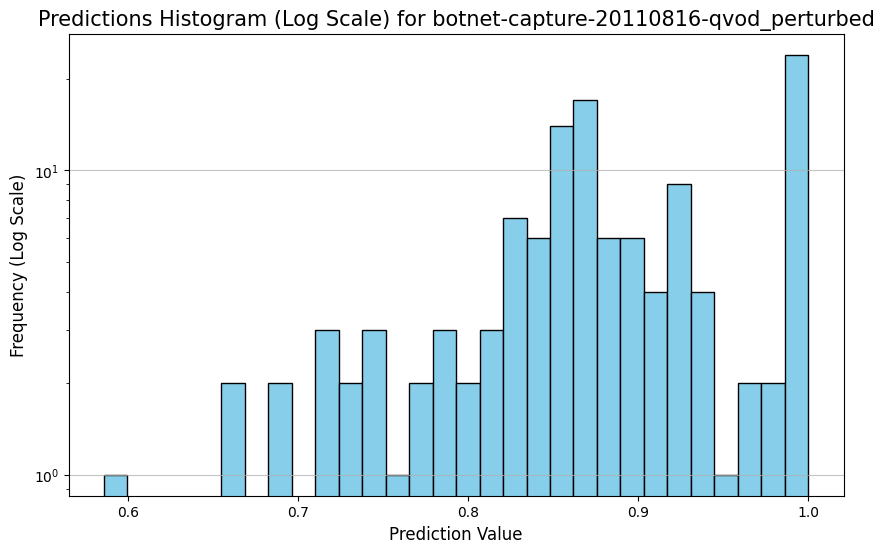

Testing botnet-capture-20110816-sogou_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.941275
dtype: float64
Number of samples: 46
Number of malicious (1) predictions: 0    9
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 95.11990%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


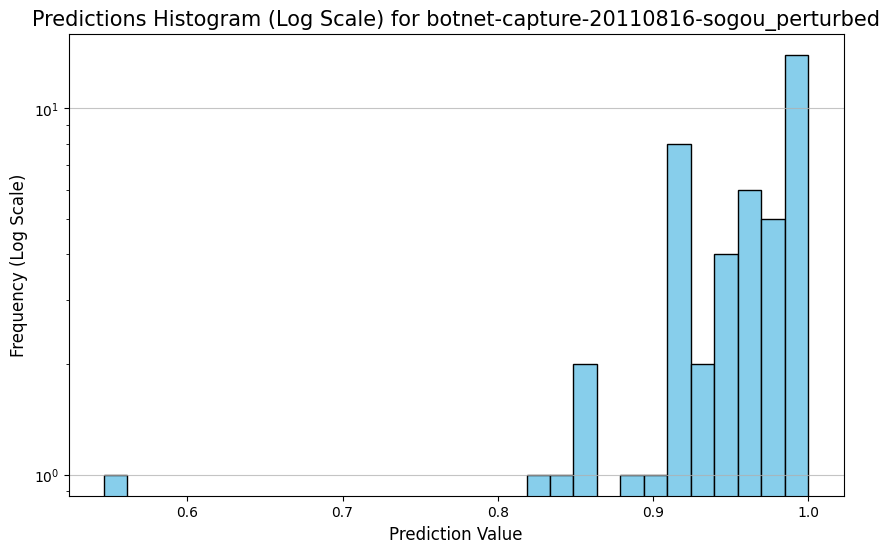

Testing botnet-capture-20110817-bot_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.954893
dtype: float64
Number of samples: 11341
Number of malicious (1) predictions: 0    2235
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 95.90731%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


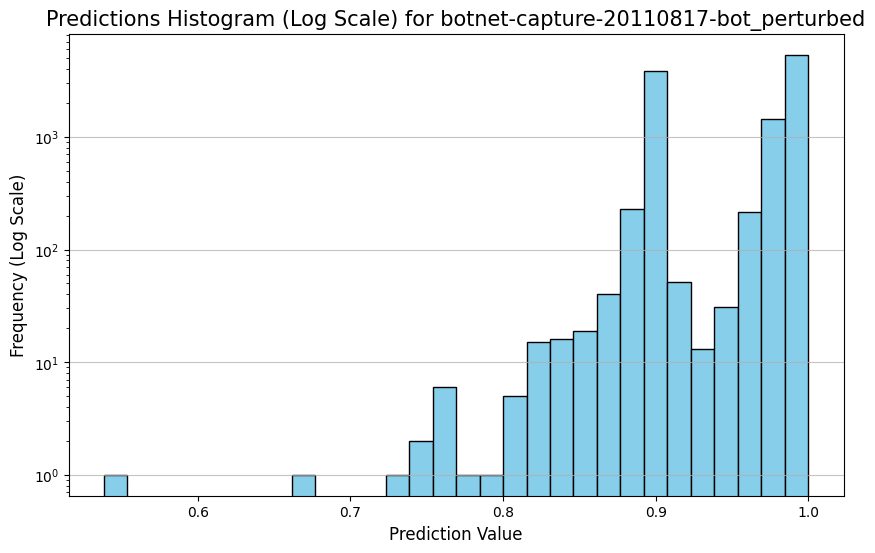

Testing botnet-capture-20110819-bot_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.958197
dtype: float64
Number of samples: 466
Number of malicious (1) predictions: 0    142
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 96.85685%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


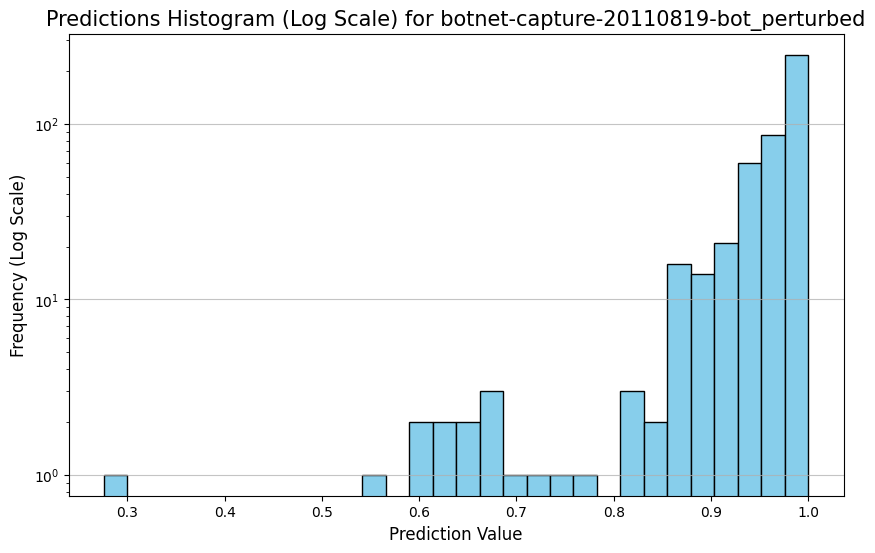

In [33]:
# # after PERTURBATIONS

import os
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, CatBoostRegressor

import sys, os
sys.path.append(os.path.abspath('../'))
from src.data.cic_preprocess import *

# Directory paths
models_dir = "../models"
data_dir = "../data/processed"
captures = ['botnet-capture-20110810-neris', 'botnet-capture-20110812-rbot', 'botnet-capture-20110815-fast-flux-2',
            'botnet-capture-20110815-fast-flux', 'botnet-capture-20110815-rbot-dos', 'botnet-capture-20110816-donbot',
            'botnet-capture-20110816-qvod', 'botnet-capture-20110816-sogou', 'botnet-capture-20110817-bot',
            'botnet-capture-20110819-bot']

# Loading models
models = {file.split('_model.cbm')[0]: CatBoostRegressor().load_model(os.path.join(models_dir, file))
          for file in os.listdir(models_dir) if file.endswith('.cbm')}

for capture in captures:

    # Testing models
    accuracies = []
    for model_name, model in models.items():
        if capture in model_name and "regressor" in model_name:
            # File name of the test data corresponds to the model name
            test_file_name = f"{capture}_perturbed_flows.csv"
            test_file_path = os.path.join(data_dir, test_file_name)
            
            # Loading test data
            X_test = preprocess_traffic(test_file_path)
            y_test = np.ones(X_test.shape[0])  # Assuming all samples are malicious, so y_test should be all ones
            
            # Model prediction
            predictions = model.predict(X_test)
            
            # Calculating accuracy
            accuracy = np.mean(predictions == y_test)
            accuracies.append(predictions)
            
            predictions = pd.DataFrame(predictions).clip(lower=0, upper =1)
            
            
            # Detailed logging
            print(f"Testing {model_name}:")
            print(f"Accuracy: {accuracy:.5%}")
            print(f"Predicted distribution: {predictions.mean()}")
            print(f"Number of samples: {len(predictions)}")
            print(f"Number of malicious (1) predictions: {np.sum(predictions == 1)}")
            print(f"Number of benign (0) predictions: {np.sum(predictions == 0)}\n")

            # Average accuracy
            mean_accuracy = np.mean(accuracies)
            print(f"\nAverage accuracy across all test cases: {mean_accuracy:.5%}")
            
           
            import matplotlib.pyplot as plt

            # Assuming your DataFrame is named 'df' and the column with predictions is named 'Predictions'

            plt.figure(figsize=(10, 6))
            plt.hist(predictions, bins=30, color='skyblue', edgecolor='black', log=True)
            plt.title(f'Predictions Histogram (Log Scale) for {capture}_perturbed', fontsize=15)
            plt.xlabel('Prediction Value', fontsize=12)
            plt.ylabel('Frequency (Log Scale)', fontsize=12)
            plt.grid(axis='y', alpha=0.75)

            plt.show()


Testing botnet-capture-20110810-neris_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 96.95430%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


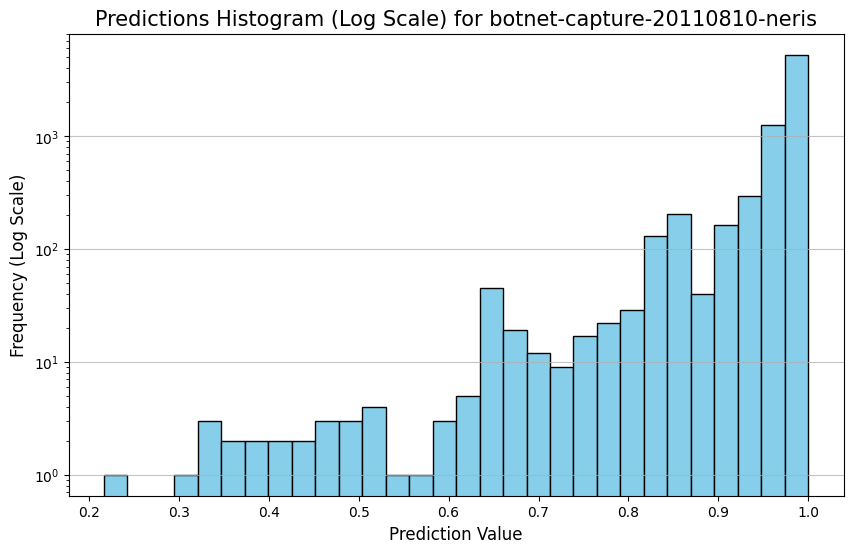

Testing botnet-capture-20110812-rbot_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 99.77408%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


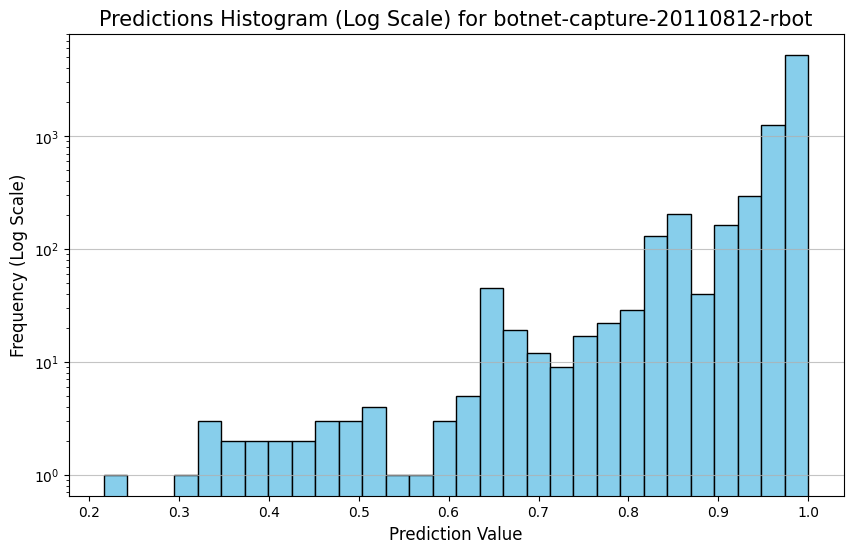

Testing botnet-capture-20110815-fast-flux-2_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 99.99446%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


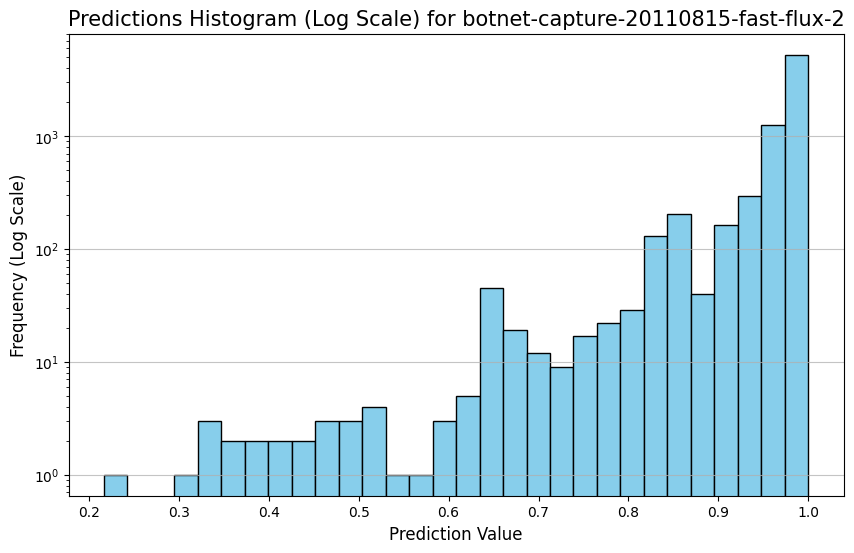

Testing botnet-capture-20110815-fast-flux-2_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 99.97778%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


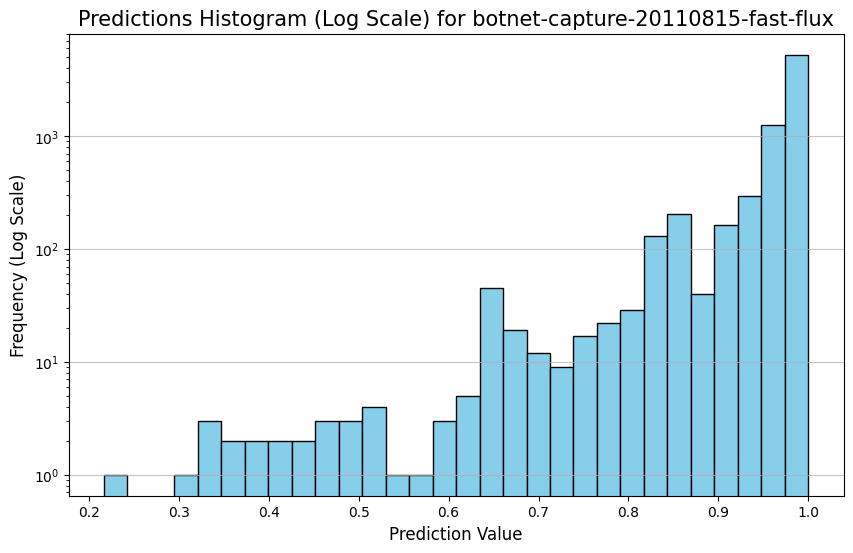

Testing botnet-capture-20110815-fast-flux_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 99.99181%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


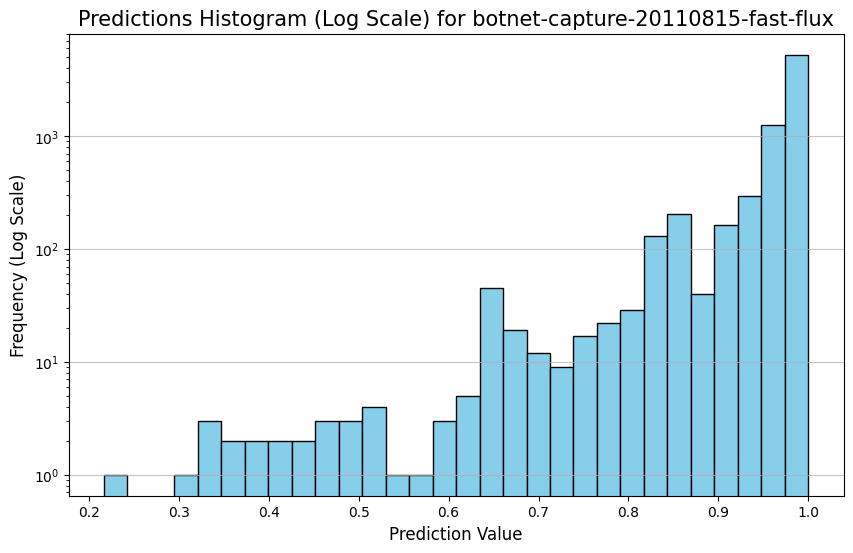

Testing botnet-capture-20110815-rbot-dos_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 99.39208%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


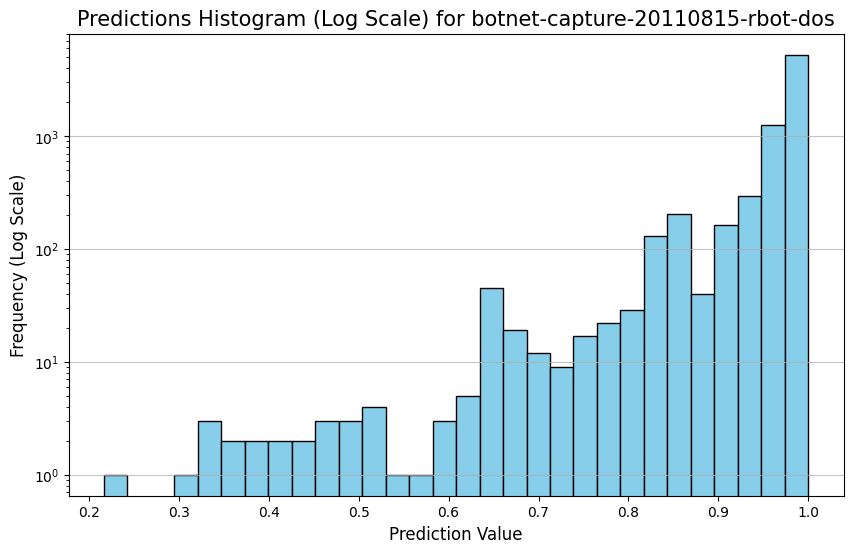

Testing botnet-capture-20110816-donbot_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 99.99973%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


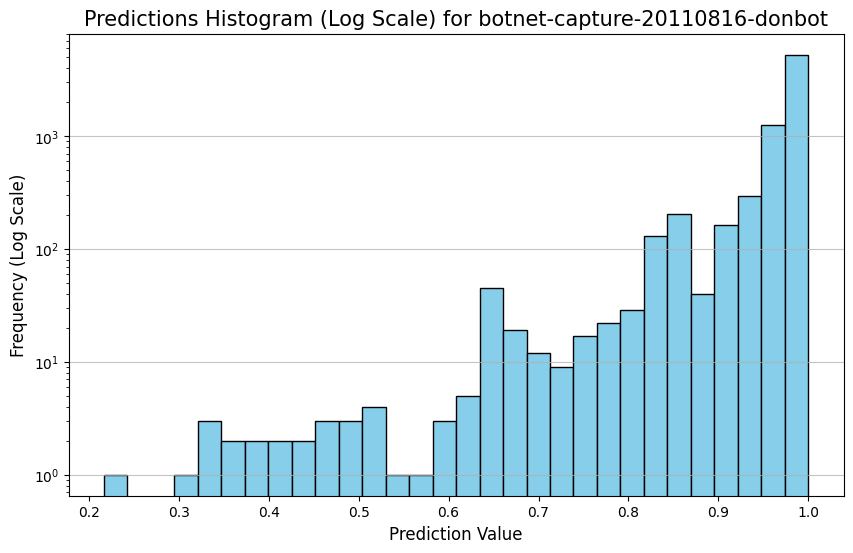

Testing botnet-capture-20110816-qvod_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 99.95393%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


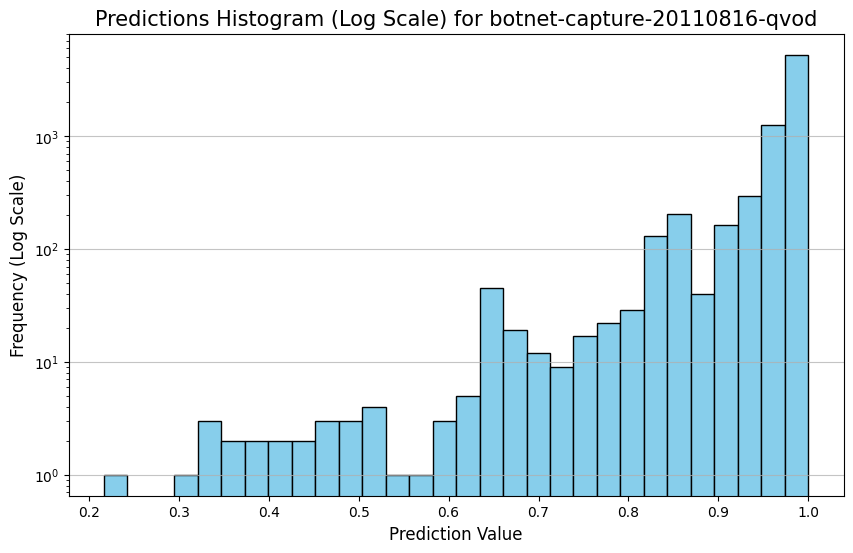

Testing botnet-capture-20110816-sogou_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 99.96147%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


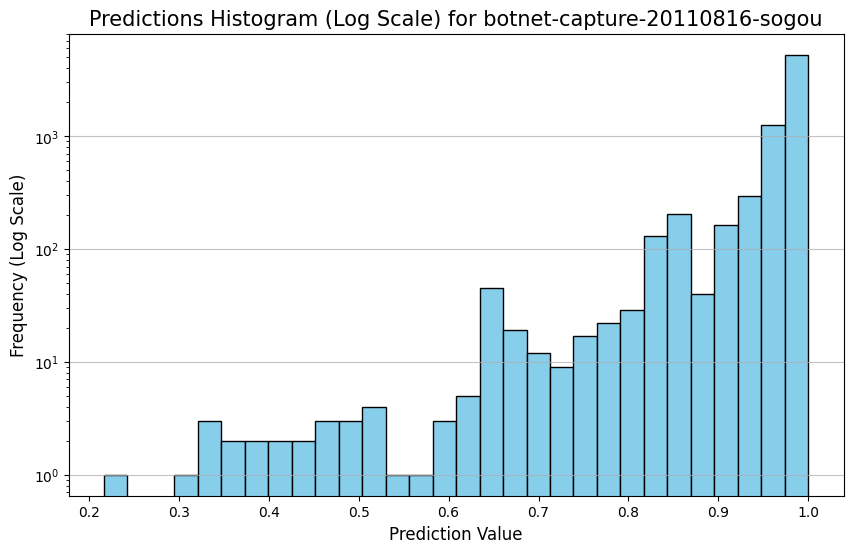

Testing botnet-capture-20110817-bot_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 99.99258%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


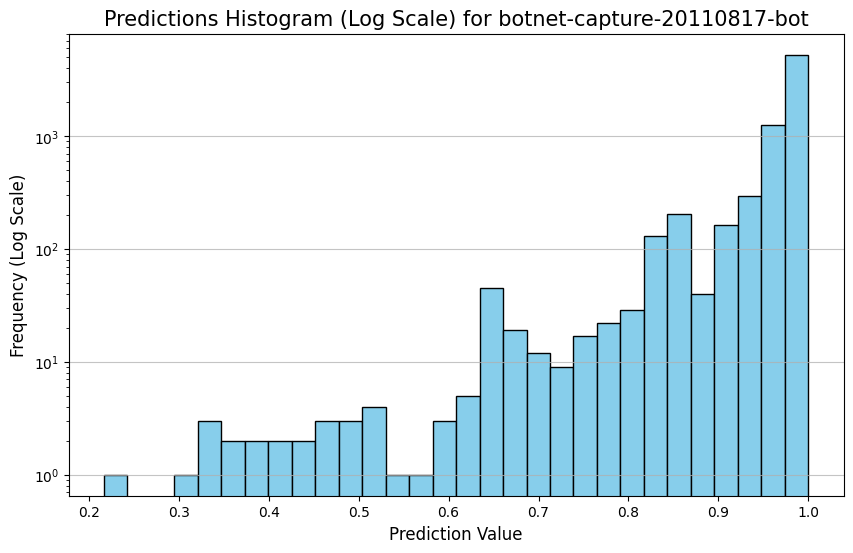

Testing botnet-capture-20110819-bot_regressor:
Accuracy: 0.00000%
Predicted distribution: 0    0.968514
dtype: float64
Number of samples: 7572
Number of malicious (1) predictions: 0    2616
dtype: int64
Number of benign (0) predictions: 0    0
dtype: int64


Average accuracy across all test cases: 97.65495%


/Users/ppopiolek/miniconda3/envs/cyberaml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


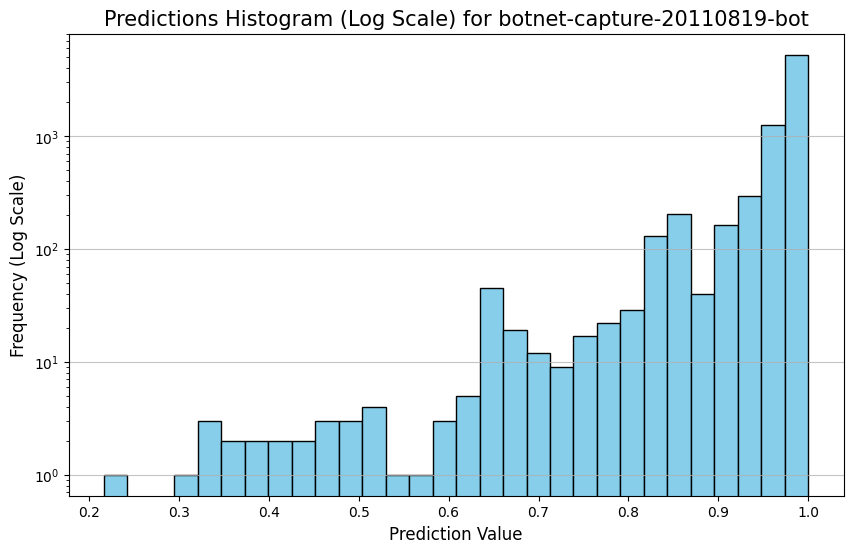

In [38]:
# # BEFORE PERTURBATIONS

import os
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, CatBoostRegressor

import sys, os
sys.path.append(os.path.abspath('../'))
from src.data.cic_preprocess import *

# Directory paths
models_dir = "../models"
data_dir = "../data/processed"
captures = ['botnet-capture-20110810-neris', 'botnet-capture-20110812-rbot', 'botnet-capture-20110815-fast-flux-2',
            'botnet-capture-20110815-fast-flux', 'botnet-capture-20110815-rbot-dos', 'botnet-capture-20110816-donbot',
            'botnet-capture-20110816-qvod', 'botnet-capture-20110816-sogou', 'botnet-capture-20110817-bot',
            'botnet-capture-20110819-bot']

# Loading models
models = {file.split('_model.cbm')[0]: CatBoostRegressor().load_model(os.path.join(models_dir, file))
          for file in os.listdir(models_dir) if file.endswith('.cbm')}

for capture in captures:

    # Testing models
    accuracies = []
    for model_name, model in models.items():
        if capture in model_name and "regressor" in model_name:
            # File name of the test data corresponds to the model name
            test_file_name = f"{capture}_processed.csv"
            test_file_path = os.path.join(data_dir, test_file_name)
            
            # Loading test data
            X_test = preprocess_traffic(test_file_path)
            y_test = np.ones(X_test.shape[0])  # Assuming all samples are malicious, so y_test should be all ones
            
            # Model prediction
            predictions = model.predict(X_test)
            
            # Calculating accuracy
            accuracy = np.mean(predictions == y_test)
            accuracies.append(predictions)
            
            predictions_before = pd.DataFrame(predictions_before).clip(lower=0, upper =1)
            
            
            # Detailed logging
            print(f"Testing {model_name}:")
            print(f"Accuracy: {accuracy:.5%}")
            print(f"Predicted distribution: {predictions_before.mean()}")
            print(f"Number of samples: {len(predictions_before)}")
            print(f"Number of malicious (1) predictions: {np.sum(predictions_before == 1)}")
            print(f"Number of benign (0) predictions: {np.sum(predictions_before == 0)}\n")

            # Average accuracy
            mean_accuracy = np.mean(accuracies)
            print(f"\nAverage accuracy across all test cases: {mean_accuracy:.5%}")
            
           
            import matplotlib.pyplot as plt

            # Assuming your DataFrame is named 'df' and the column with predictions is named 'Predictions'

            plt.figure(figsize=(10, 6))
            plt.hist(predictions_before, bins=30, color='skyblue', edgecolor='black', log=True)
            plt.title(f'Predictions Histogram (Log Scale) for {capture}', fontsize=15)
            plt.xlabel('Prediction Value', fontsize=12)
            plt.ylabel('Frequency (Log Scale)', fontsize=12)
            plt.grid(axis='y', alpha=0.75)

            plt.show()


In [24]:
predictions.mean()

0.9538343366849893